In [2]:
import requests
from bs4 import BeautifulSoup, element
import numpy as np 
import pandas as pd 
import re, itertools
import matplotlib.pyplot as plt
import wordcloud as wc

In [3]:
pages = pd.read_csv("tandf2018.csv")
pages = pages['pages'].tolist()
articles = pd.DataFrame(columns = ['authors', 'journal', 'title', 'published', 'keywords'])

ctr = 0

for page in pages:

    print(page)

    prefix = re.search('https://.*com', page).group(0)
    
    page = requests.get(page)
    soup = BeautifulSoup(page.content, "lxml")
    keywords = soup.find("div", class_ = "hlFld-KeywordText")
    keywords = keywords.find_all("a")
    keywords = ', '.join([k.text.strip() for k in keywords])

    cit_ref = soup.find('li', class_ = 'downloadCitations').find('a')['href']
    cit_page = requests.get(prefix + cit_ref)
    cit_soup = BeautifulSoup(cit_page.content, 'lxml')
    citation = cit_soup.find('div', class_ = 'pub-meta').text.replace('\n', ' ').strip()

    journal = soup.find('span', class_ = 'journal-heading').text.replace('\n', ' ').strip()
    authors = citation.split('(')[0].replace(' &', ',')
    date = re.search('(\d{4})', citation).group(0)
    title = re.search('\)[^,]*', citation).group(0)[2:]

    articles = articles.append({'authors': authors,
                                'journal': journal,
                                'title': title,
                                'published': date,
                                'keywords': keywords}, ignore_index=True)

display(articles)

https://www.tandfonline.com/doi/abs/10.1080/10584609.2017.1334730
https://www.tandfonline.com/doi/abs/10.1080/10584609.2017.1334729
https://www.tandfonline.com/doi/abs/10.1080/10584609.2017.1334728
https://www.tandfonline.com/doi/abs/10.1080/10584609.2017.1388310
https://www.tandfonline.com/doi/abs/10.1080/10584609.2017.1355857
https://www.tandfonline.com/doi/abs/10.1080/10584609.2017.1334726
https://www.tandfonline.com/doi/abs/10.1080/10584609.2017.1364814
https://www.tandfonline.com/doi/abs/10.1080/10584609.2017.1333550
https://www.tandfonline.com/doi/abs/10.1080/10584609.2017.1334018
https://www.tandfonline.com/doi/abs/10.1080/10584609.2017.1336502
https://www.tandfonline.com/doi/abs/10.1080/10584609.2017.1339221
https://www.tandfonline.com/doi/abs/10.1080/10584609.2017.1339222
https://www.tandfonline.com/doi/abs/10.1080/10584609.2017.1354947
https://www.tandfonline.com/doi/abs/10.1080/10584609.2017.1380092
https://www.tandfonline.com/doi/abs/10.1080/10584609.2017.1341965
https://ww

,authors,journal,title,published,keywords
0,"Leticia Bode, Emily K. Vraga",Political Communication,Studying Politics Across Media,2018,"affordances, media, platforms, research agenda"
1,"Taewoo Kang, Erika Franklin Fowler, Michael M....",Political Communication,Issue Consistency? Comparing Television Advert...,2018,"campaigns, advertising, e-mail, Twitter"
2,"Sebastian Stier, Arnim Bleier, Haiko Lietz, Ma...",Political Communication,Election Campaigning on Social Media: Politicians,2018,"cross-media analysis, language models, online ..."
3,"Sanne Kruikemeier, Sophie Lecheler, Ming M. Bo...",Political Communication,Learning From News on Different Media Platform...,2018,"news website, printed newspaper, platforms, le..."
4,Emily Sydnor,Political Communication,Platforms for Incivility: Examining Perception...,2018,"hybridity, incivility, media platforms, mix of..."
...,...,...,...,...,...
234,"Edson C. Tandoc Jr., Cassie Yuan Wen Foo",Digital Journalism,Here’s What BuzzFeed Journalists Think of Thei...,2018,"Audience, BuzzFeed, ethics, field theory, onli..."
235,"Joo-Young Jung, Mikko Villi",Digital Journalism,Newspapers and Cross-Level Communications on S...,2018,"Finland, Japan, Korea, media system dependency..."
236,Neil Thurman,Digital Journalism,Social Media,2018,"algorithms, artificial intelligence, computati..."
237,Eisa Al Nashmi,Digital Journalism,From Selfies to Media Events,2018,"Charlie Hebdo, images, Instagram, media events..."


In [6]:
pages = pd.read_csv("sage2018.csv")
pages = pages['pages'].tolist()
articles2 = pd.DataFrame(columns = ['authors', 'journal', 'title', 'published', 'keywords'])

for page in pages:

    print(page)

    prefix = re.search('https://.*com', page).group(0)
    
    page = requests.get(page)
    soup = BeautifulSoup(page.content, "lxml")
    keywords = soup.find("div", class_ = "hlFld-KeywordText")
    keywords = keywords.find_all("a")
    keywords = ', '.join([k.text.strip() for k in keywords])

    journal = soup.find('a', id = 'headerTitle').text.replace('\n', ' ').strip()

    title = soup.find('h1').text.replace('\n', ' ').strip()
    author = soup.find('div', 'hlFld-ContribAuthor').find_all('span', 'contribDegrees')
    author = ', '.join([a.find('a').text.strip() for a in author])
    date = re.search('\d{4}', soup.find('div', 'published-dates').text.split(':')[-1].strip()).group(0)

    articles2 = articles2.append({'authors': author,
                                'journal': journal,
                                'title': title,
                                'published': date,
                                'keywords': keywords}, ignore_index=True)

display(articles2)

https://journals.sagepub.com/doi/abs/10.1177/1464884916689150
https://journals.sagepub.com/doi/abs/10.1177/1464884916689151
https://journals.sagepub.com/doi/abs/10.1177/1464884916689152
https://journals.sagepub.com/doi/abs/10.1177/1464884916689153
https://journals.sagepub.com/doi/abs/10.1177/1464884916689154
https://journals.sagepub.com/doi/abs/10.1177/1464884916689155
https://journals.sagepub.com/doi/abs/10.1177/1464884916688964
https://journals.sagepub.com/doi/abs/10.1177/1464884916670931
https://journals.sagepub.com/doi/abs/10.1177/1464884916673386
https://journals.sagepub.com/doi/abs/10.1177/1464884916688550
https://journals.sagepub.com/doi/abs/10.1177/1464884916689573
https://journals.sagepub.com/doi/abs/10.1177/1464884917691785
https://journals.sagepub.com/doi/abs/10.1177/1464884917699854
https://journals.sagepub.com/doi/abs/10.1177/1464884916663622
https://journals.sagepub.com/doi/abs/10.1177/1464884917715945
https://journals.sagepub.com/doi/abs/10.1177/1464884917716594
https://

,authors,journal,title,published,keywords
0,"Kevin G Barnhurst, Andrew W Nightingale",Journalism,"Time, realism, news",2018,"Arendt, epistemology, history, modernism, news..."
1,Nikki Usher,Journalism,Breaking news production processes in US metro...,2018,"24/7 news, analytics, breaking news, immediacy..."
2,"Keren Tenenboim-Weinblatt, Motti Neiger",Journalism,Temporal affordances in the news,2018,"Media and time, affordances, print versus onli..."
3,"Henrik Bødker, Niels Brügger",Journalism,The shifting temporalities of online news: The...,2018,"Online news, temporality, website analysis"
4,Julia Sonnevend,Journalism,Interruptions of time: The coverage of the mis...,2018,"Event, Malaysia, MH370, narrative, temporality..."
...,...,...,...,...,...
400,Mark A Rademacher,New Media & Society,“The most inspiring bikini photos you’ll see t...,2018,"Ostomy, selfies, social media, stigma, user-ge..."
401,"Alix Rufas, Christine Hine",New Media & Society,Everyday connections between online and offlin...,2018,"Class, community, Freecycle, identity, network..."
402,"Jenny L Davis, Tony P Love, Gemma Killen",New Media & Society,Seriously funny: The political work of humor o...,2018,"Discourse, humor, politics, small data, Twitter"
403,Hsuan-Ting Chen,New Media & Society,Spiral of silence on social media and the mode...,2018,"Political disagreement, political expression, ..."


In [7]:
#articles = articles.append(articles2, ignore_index = True)
articles2.to_csv('keywords2_2018.csv')

In [13]:
len(articles)

513

In [4]:
articles.to_csv('keywords_2018.csv')

In [3]:
articles = pd.read_csv('keywords.csv')

In [72]:
keywords = articles['keywords'].tolist()
keywords = [k.split(', ') for k in keywords]
keywords = list(itertools.chain.from_iterable(keywords))
keywords = pd.Series(keywords)
print('total keywords: ' + str(len(keywords)))
vc = keywords.value_counts()
print('unique keywords: ' + str(len(vc)))
vc = vc[vc > 9]
print('unique keywords with >=10 instances: ' + str(len(vc)))
vc

total keywords: 3540
unique keywords: 2264
unique keywords with >=10 instances: 24


social media               90
journalism                 56
Twitter                    28
content analysis           24
online news                19
news                       19
Facebook                   18
journalism studies         15
disinformation             14
political communication    13
Journalism                 13
Instagram                  13
digital journalism         12
news consumption           12
fake news                  12
epistemology               11
public opinion             11
Digital journalism         11
newspapers                 11
populism                   11
online journalism          10
news values                10
journalists                10
democracy                  10
dtype: int64

In [73]:
keywords = [k.replace(' ', '').replace('-', '') for k in keywords.tolist()]
print(keywords)
wordcloud = wc.WordCloud(width = 800, height = 800).generate(' '.join(keywords) + ' ')

['DonaldTrump', 'sexism', 'voting', '2016election', 'AccessHollywoodTape', 'politicalincivility', 'simplisticargumentation', 'experimentaldesign', 'politicaltrust', 'persuasion', 'affectivepolarization', 'intergroupcontact', 'intergrouphostility', 'partisanship', 'partisans', 'issueownership', 'politicalparties', 'position', 'competence', 'commitment', 'negativecampaigning', 'citizens’politicaltalk', 'deliberativedemocracy', 'deliberativesystem', 'publicsphere', 'socialnetworks', 'partisanmedia', 'reinforcingspirals', 'mediaeffects', 'refugees', 'immigration', 'publicopinion', 'media', 'populistcommunication', 'cognitivepriming', 'affectivepriming', 'stereotypes', 'comparativeresearch', 'experiment', 'rightwingpopulism', 'Muslims', 'experiment', 'perceiveddiscrimination', 'collectiveaction', 'longtermeffects', 'politicaltalk', 'listening', 'deliberation', 'dialogue', 'intergroupcommunication', 'imaginedinteractions', 'intergroupcontacttheory', 'politicalsophistication', 'politicalmisin

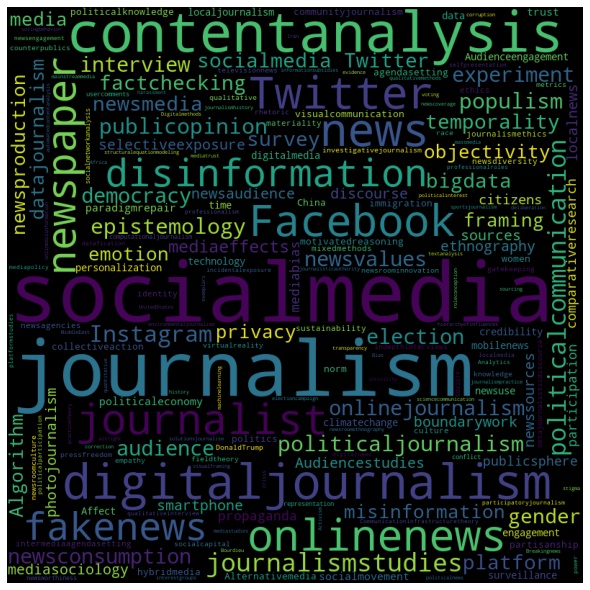

In [74]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 